#**1. Goal**
We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on ave??er?

#**2. Import and Loading**

## Load Libraries & Functions

In [ ]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


## Load Data

In [ ]:
# Open saved file and preview again
df_main = pd.read_csv("Data/insurance.csv", low_memory = False)
df_main.info()
#Make a copy
df = df_main


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Clean the Data

In [ ]:
#Duplicate count
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 1 duplicate rows.


In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [ ]:
#Check for categorical descrepencies
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())

male      675
female    662
Name: sex, dtype: int64
no     1063
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


In [ ]:
#Display top 5
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Q1: Do smokers have higher insurance charges than non-smokers?
- Null Hyposthesis Smoker do not have a higher insurance charge than non-smokers
- Alternative Hyposthesis Smoker do have a higher insurance charge than non-smokers

Q2: Select the correct test according to the data type and number of samples
Data Type - Numerical and 2 Sample test

In [ ]:
#Visualise data
df['smoker'].value_counts(1)

no     0.795064
yes    0.204936
Name: smoker, dtype: float64

<Axes: xlabel='smoker', ylabel='count'>

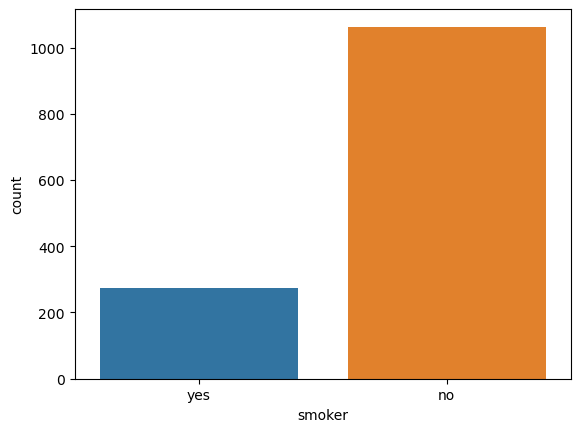

In [ ]:
#Visualise smoker count
sns.countplot(data=df,x='smoker')

<Axes: xlabel='charges', ylabel='Density'>

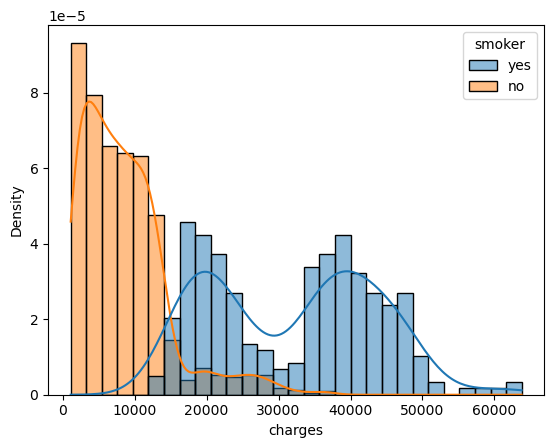

In [ ]:
## visualize the histogram of charges, but separate it by "smoker"
sns.histplot(data=df, x='charges',hue='smoker',common_norm=False,
             stat='density',kde=True)

In [ ]:
## Separate the 2 groups into 2 variables
grp_yes = df.loc[df['smoker']=="yes", 'charges']
grp_no = df.loc[df['smoker']=="no", 'charges']

display(grp_yes.head(), grp_no.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

Q3: Assumptions
- Since we are comparing a numeric measurement between 2 groups, we want to run a 2-sample (AKA independent T-test).

- The Assumptions are:
    - No significant outliers
    - Normality
    - EqualVariiance

## Assumption: No significant outliers

In [ ]:
#Q3: Test the assumptions of your selected test.
#Apply the Z-score rule
## check yes group for outliers using z-score >3 rule.
outliers_yes = np.abs(stats.zscore(grp_yes))>3
outliers_yes.sum()

0

In [ ]:
## check no group for outliers using z-score >3 rule.
outliers_no = np.abs(stats.zscore(grp_no))>3
outliers_no.sum()

24

** Interpretation **
Outliers found in no group therefore Assumption is incorrect/no met

## Assumption: Normally distributed groups

In [ ]:
## use normaltest to check if yes group is normally distributed
stats.normaltest(grp_yes)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [ ]:
## use normaltest to check if no group is normally distributed
stats.normaltest(grp_no)

NormaltestResult(statistic=316.23579659917766, pvalue=2.1392881146814186e-69)

** Interpretation **
Not normally distributed

## Assumption: Equal variance

In [ ]:
## use Levene's test to check if groups have equal variance
stats.levene(grp_yes, grp_no)

LeveneResult(statistic=332.47137394800666, pvalue=1.670117565125241e-66)

** Interpretation **
Equal variance failed

### Perform Final Hypothesis Test (T-Test)

In [ ]:
## run stats.ttest_ind on the 2 groups
results = stats.ttest_ind(grp_yes, grp_no)
results

Ttest_indResult(statistic=46.64479459840305, pvalue=1.4067220949376498e-282)

** Interpretation **
- T-Test returned a p-value of 1.4. Since p>.05, we can accept the null hypothesis that smokers have higher insurance charges than non-smokers


We thereforeject he alternative hypothesis that there isno  a significant difference insurance costdes betwesmokers and non-smokersess.
Our visualization below shows that students with internet access have HIGHER average grades.

<Axes: xlabel='smoker', ylabel='charges'>

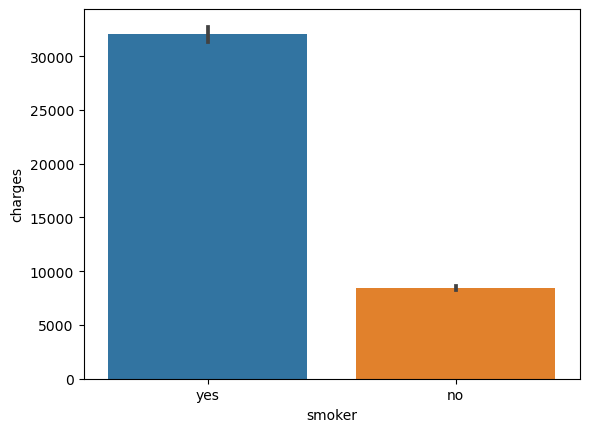

In [ ]:
## Add a summary visual to support our results.
sns.barplot(data=df, x='smoker',y='charges',errorbar=('ci',68))

Q2. Are men more likely to smoke than women?
Null Hypothesis Men are not likely to smoke more than women
Alternative Hypsthesi Men are more likely to smoke than womens

Q2: Select the correct test according to the data type and number of samples Data Type - Categorical and Chi-Square

In [ ]:
#Visualise data
df['sex'].value_counts(1)

male      0.504862
female    0.495138
Name: sex, dtype: float64

<Axes: xlabel='sex', ylabel='count'>

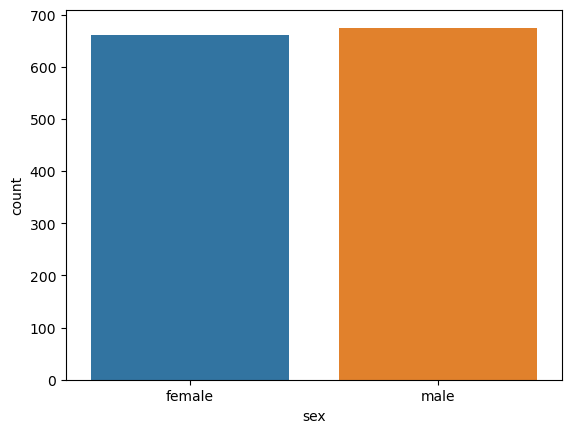

In [ ]:
#Visualise sex count
sns.countplot(data=df,x='sex')

<Axes: xlabel='sex', ylabel='Density'>

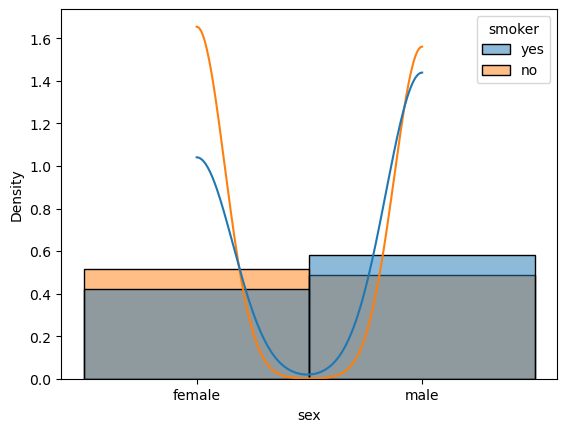

In [ ]:
## visualize the histogram of gender, but separate it by "smoker"
sns.histplot(data=df, x='sex',hue='smoker',common_norm=False,
             stat='density',kde=True)

In [ ]:
## Separate the 2 groups into 2 variables
grp_yes = df.loc[df['smoker']=="yes", 'sex']
grp_no = df.loc[df['smoker']=="no", 'sex']

display(grp_yes.head(), grp_no.head())

0     female
11    female
14      male
19      male
23    female
Name: sex, dtype: object

1      male
2      male
3      male
4      male
5    female
Name: sex, dtype: object

Q3: Assumptions

Since we are comparing categoricalic measurement between 2 groups, we want to run Chi-square testt).

The Assumptions are:

No significant outliers
Normality
Eqal Variiance

## Assumption: No significant outliers

In [ ]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,516,159


In [ ]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [ ]:
# What was our p-value?
print(p)
p<.05

0.0062765550120107375


True

** Interpretation **
P-value is less than 0.05 and therefore we reject the null hypothesis that men are not more likely to smoke than female
and accept the alternative that men are more likely to smoke than women


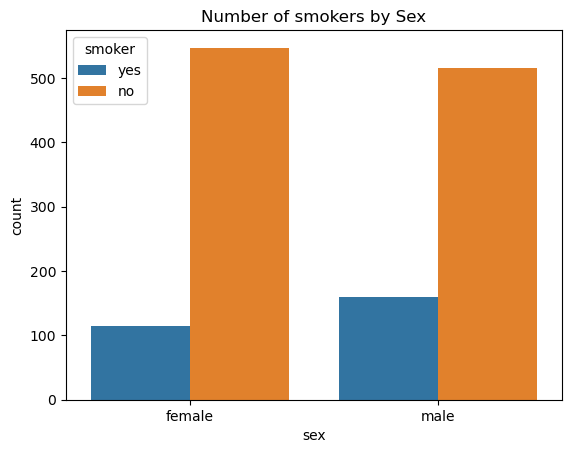

In [ ]:
#Visualise the correct hyposthesis
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokers by Sex");

- Q3. Do different regions have different charges, on average?
-  Null Hyposthesis there is no difference in charges on average between different regions
-  Alternative Hyposthesis There is a significant difference in charges on average between the regions

Q2: Select the correct test according to the data type and number of samples Data Type - Numerical and ANOVA and/or Tukey

In [ ]:
#Visualise data
df['region'].value_counts(1)

southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: region, dtype: float64

<Axes: xlabel='region', ylabel='count'>

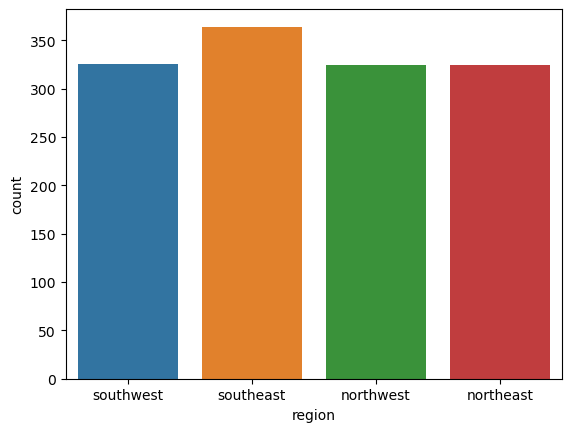

In [ ]:
#Visualise smoker count
sns.countplot(data=df,x='region')

<Axes: xlabel='charges', ylabel='Density'>

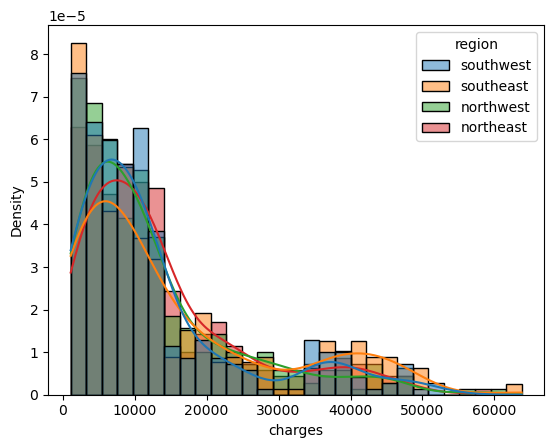

In [ ]:
## visualize the histogram of charges, but separate it by "smoker"
sns.histplot(data=df, x='charges',hue='region',common_norm=False,
             stat='density',kde=True)

Q3: Assumptions
- Since we are comparing a numeric measurement between 4 groups, we want to run a ANOVA and/or Tukey test.

- The Assumptions are:
    - No significant outliers
    - Normality
    - Equal Variance

In [ ]:
## Create groups dictionary. There are only 4 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()

    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [ ]:
#Test the assumption of normality
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,324.0,6.502634e-24,106.779670
northeast,324.0,1.455431e-19,86.747629


In [ ]:
### checking sig with pandas
norm_results_df['sig'] = norm_results_df['p'] < .05
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,324.0,6.502634e-24,106.779670,True
northeast,324.0,1.455431e-19,86.747629,True


** Interpretation **
Each group does not have a normal distribution

In [ ]:
# with the * operator
stats.levene(*groups.values())

LeveneResult(statistic=5.553479860699911, pvalue=0.0008689544824002284)

** Interpretation **
- High significant value, therefore not equal variance

In [ ]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.926139903662776, pvalue=0.03276288025444947)

** Interpretation **
- Confirmation that we have a significant value base on P value < 0.05


In [ ]:
# use turkey to retirb multiple comparisons
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [ ]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-955.5437,0.7457,-3397.7353,1486.648,False
northeast,southeast,1329.0269,0.4746,-1045.1237,3703.1776,False
northeast,southwest,-1059.4471,0.6793,-3499.7595,1380.8652,False
northwest,southeast,2284.5706,0.0643,-89.58,4658.7212,False
northwest,southwest,-103.9035,0.9995,-2544.2158,2336.4088,False
southeast,southwest,-2388.4741,0.0477,-4760.6915,-16.2567,True


** Interpretation **
1 significant result between southeast and southwest regions in terms of charges. No real difference between the other regions.